Ciência de Dados


Sobre o conjunto de dados:

"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

Base dos Dados:
https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups

In [1]:
# importar as libs:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
Base_Dados = pd.read_csv('unicorns till sep 2022.csv')

In [20]:
Base_Dados.shape

(1186, 7)

In [21]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [22]:
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [25]:
# Renomeando as colunas para PT-BR

Base_Dados.rename(columns= {
    'Date Joined' : 'Data de Adesão',
    'Company' : 'Empresa',
    'Country' : 'Pais',
    'City ' : 'Cidade',
    'Valuation ($B)': 'Valor ($)',
    'Industry': 'Setor',
    'Investors' : 'Investidores',
}, inplace=True)

In [26]:
Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [27]:
 Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [32]:
# Verificar Nulos
Base_Dados.isnull().sum()

,0
Empresa,0
Valor ($),0
Data de Adesão,0
Pais,0
City,0
Setor,0
Investidores,18


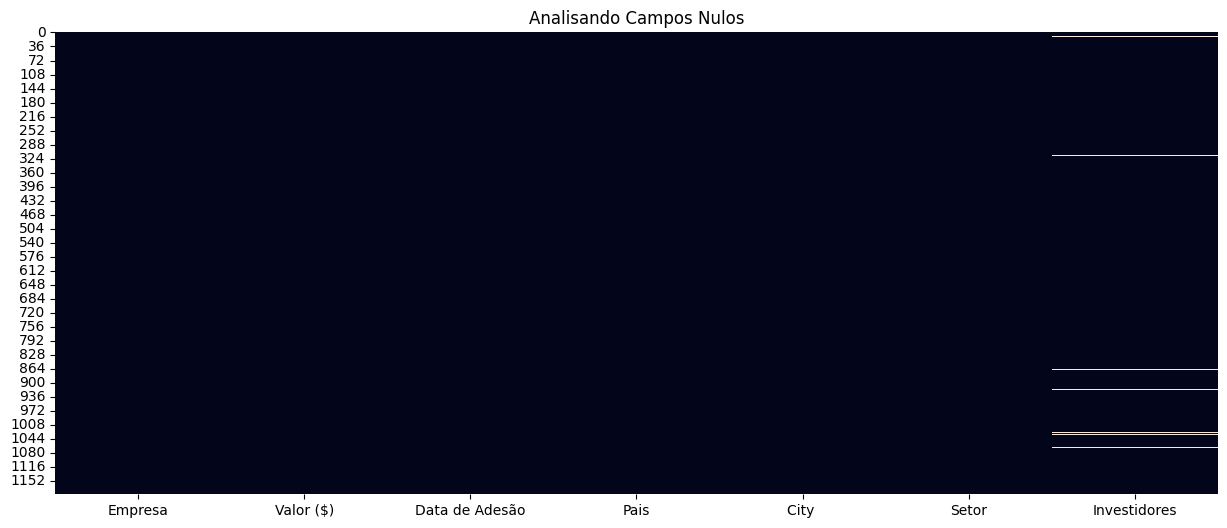

In [35]:
# Gráfico Nulos
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False);

In [36]:
# Verificar campos unicos
Base_Dados.nunique()

,0
Empresa,1183
Valor ($),222
Data de Adesão,695
Pais,48
City,286
Setor,34
Investidores,1152


In [37]:
# Valor unico de setor:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [41]:
# Valores unicos Ranking
Base_Dados['Setor'].value_counts()

,count
Setor,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
"Supply chain, logistics, & delivery",65
Other,65
Cybersecurity,58
Data management & analytics,45


In [42]:
Base_Dados['Setor'].value_counts(normalize=True)

,proportion
Setor,
Fintech,0.201518
Internet software & services,0.188870
E-commerce & direct-to-consumer,0.086847
Health,0.079258
Artificial intelligence,0.062395
"Supply chain, logistics, & delivery",0.054806
Other,0.054806
Cybersecurity,0.048904
Data management & analytics,0.037943


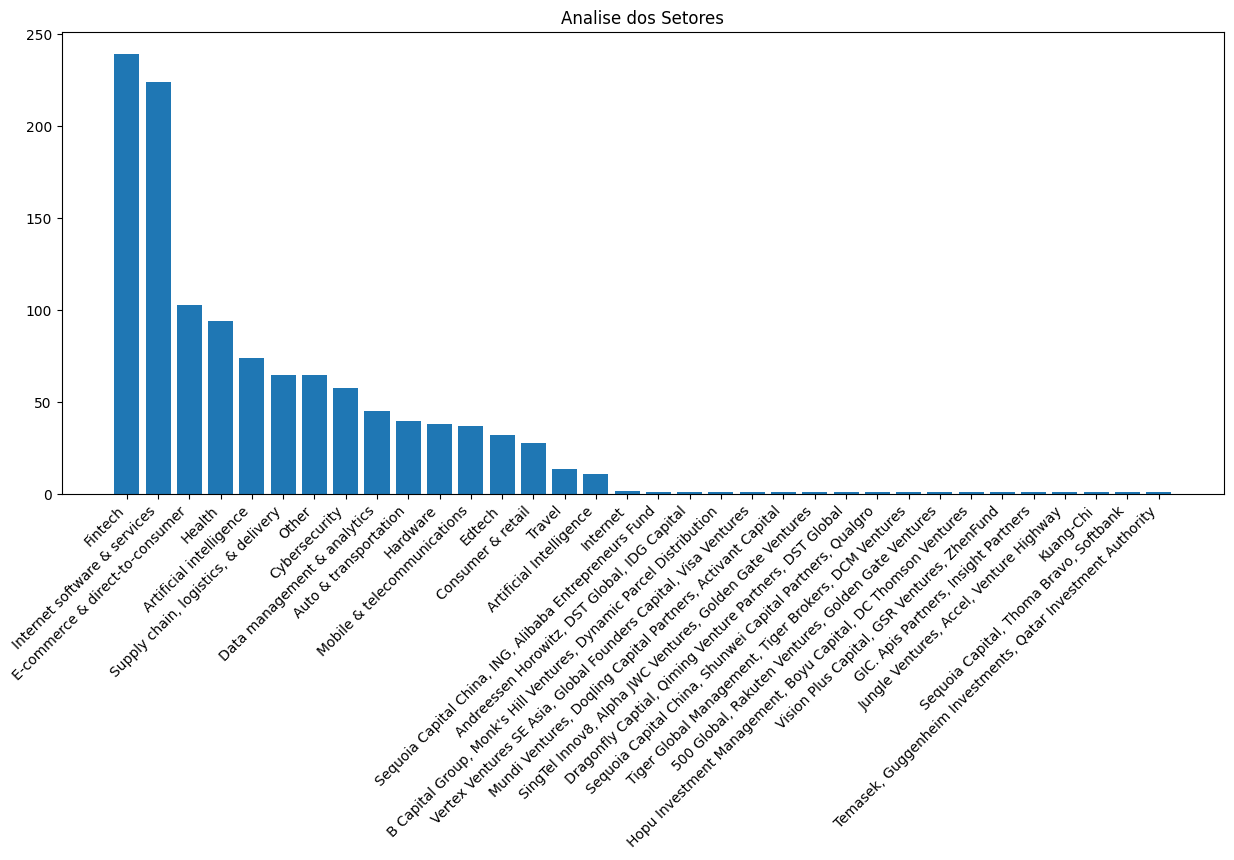

In [44]:
# Análise Grágica
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [49]:
Analise = round(Base_Dados['Pais'].value_counts(normalize = True) * 100 , 1)

In [50]:
Analise

,proportion
Pais,
United States,53.6
China,14.7
India,5.9
United Kingdom,3.9
Germany,2.4
France,2.0
Israel,1.9
Canada,1.6
Brazil,1.4


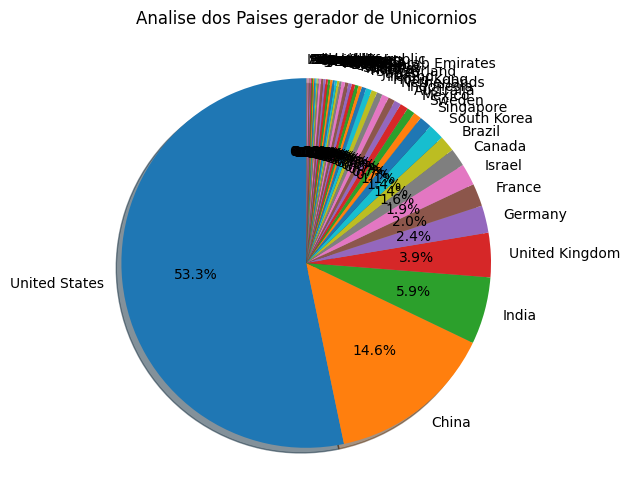

In [51]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

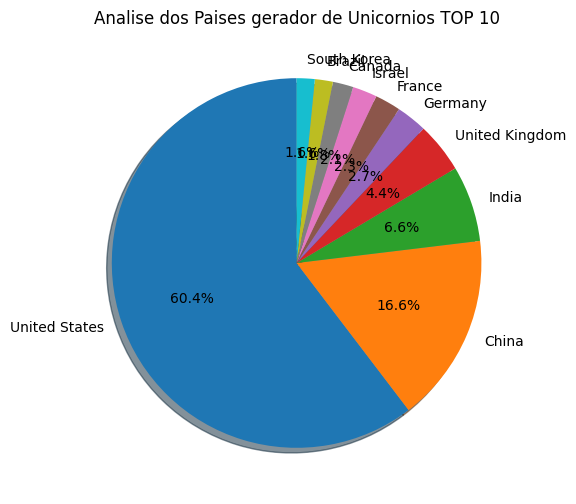

In [53]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios TOP 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [54]:
# Conversão para Data

Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

In [56]:
Base_Dados['Data de Adesão'].head()

,Data de Adesão
0,2017-04-07
1,2012-12-01
2,2018-07-03
3,2014-01-23
4,2018-01-08


In [57]:
# Extrair o Ano e Mês
Base_Dados['Ano'] = Base_Dados['Data de Adesão'].dt.year
Base_Dados['Mes'] = Base_Dados['Data de Adesão'].dt.month

In [58]:
Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Ano,Mes
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [60]:
# Tabela Analitica
Analise_Agrupada = Base_Dados.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count().reset_index()

Analise_Agrupada

,Pais,Ano,Mes,Empresa,Valor ($),Data de Adesão,City,Setor,Investidores
0,Argentina,2021,8,Uala,1,1,1,1,1
1,Australia,2018,1,Canva,1,1,1,1,1
2,Australia,2019,3,Airwallex,1,1,1,1,1
3,Australia,2021,5,SafetyCulture,1,1,1,1,1
4,Australia,2021,7,Culture Amp,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1181,United States,2022,8,Flow,1,1,1,1,1
1182,United States,2022,8,Incredible Health,1,1,1,1,1
1183,United States,2022,8,Orna Therapeutics,1,1,1,1,1
1184,Vietnam,2021,10,Sky Mavis,1,1,1,1,1


In [61]:
Analise_Agrupada.loc[
  Analise_Agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,Valor ($),Data de Adesão,City,Setor,Investidores
16,Brazil,2018,7,Movile,1,1,1,1,1
17,Brazil,2018,11,iFood,1,1,1,1,1
18,Brazil,2019,6,Loggi,1,1,1,1,1
19,Brazil,2019,9,QuintoAndar,1,1,1,1,1
20,Brazil,2019,10,EBANX,1,1,1,1,1
21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1
22,Brazil,2020,1,Loft,1,1,1,1,1
23,Brazil,2020,12,C6 Bank,1,1,1,1,1
24,Brazil,2020,12,Creditas,1,1,1,1,1
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1


In [65]:
# Transformando a coluna Valor
Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'], errors='coerce')

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Ano,Mes
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,7
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [67]:
# Tabela Analitica
Analise_Pais = Base_Dados.groupby(by=['Pais'])['Valor ($)'].sum().reset_index()

Analise_Pais.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [74]:
Analise_Valor = Analise_Pais.sort_values(by='Valor ($)', ascending=False)
Analise_Valor.head()

,Pais,Valor ($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


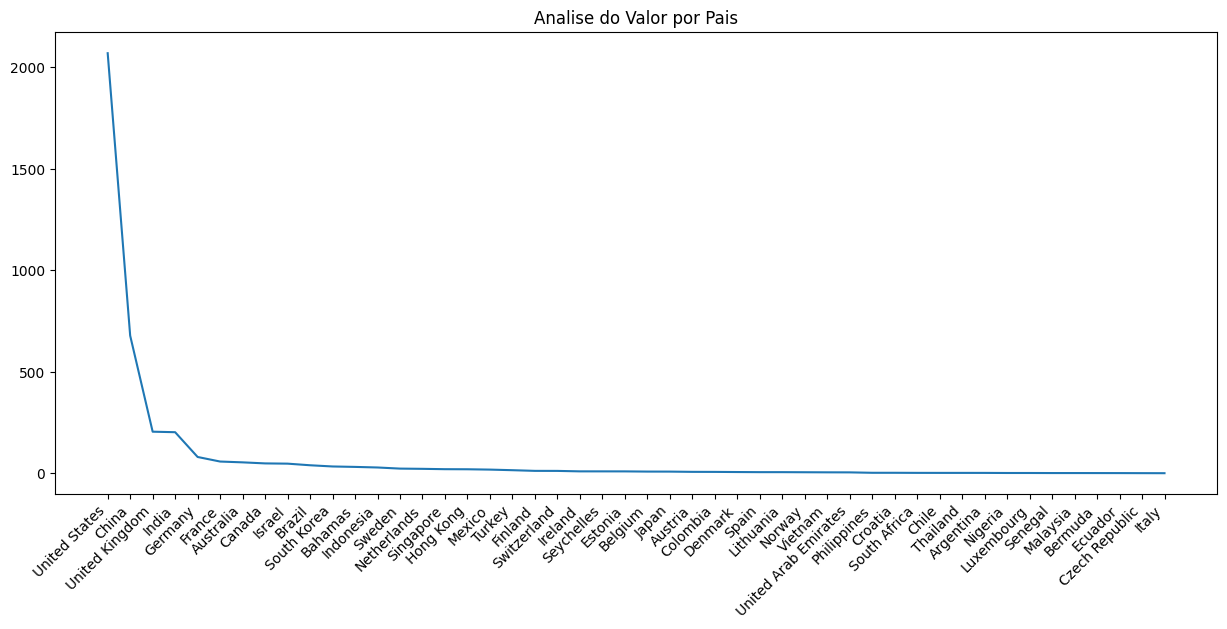

In [75]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_Valor['Pais'], Analise_Valor['Valor ($)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');

# De acordo com os dados coletados até setembro de 2022, conseguimos analisar que os Estados Unidos é o país com mais geração de Unicórnios, seguido pela China e India, e em 9º lugar o Brasil.

# Os principais setores dessas empresas Unicórnios são:
# * Fintech	ocupando um pouco mais de 20%,
# * Internet software & services	com 18%
# * E-commerce & direct-to-consumer com 8%
